In [34]:
%pylab inline
from __future__ import division
import os
import numpy as np
import PIL.Image as pil
import tensorflow as tf
from SfMLearner import SfMLearner
from utils import normalize_depth_for_display
tf.reset_default_graph()

img_height=128
img_width=416
ckpt_file = 'models/model-190532'

fh = open('misc/sample.png', 'r')
I = pil.open(fh)
I = I.resize((img_width, img_height), pil.ANTIALIAS)
I = np.array(I)
print(I.shape)

##------------
fh2 = open('misc/images.png', 'r')
I2 = pil.open(fh2).convert('RGB')
I2 = I2.resize((img_width, img_height), pil.ANTIALIAS)
I2 = np.array(I2)
#print(I2.shape)
##--------------


Populating the interactive namespace from numpy and matplotlib
(128, 416, 3)


In [35]:
sfm = SfMLearner()
sfm.setup_inference(img_height,
                    img_width,
                    mode='depth')

In [36]:
saver = tf.train.Saver([var for var in tf.model_variables()]) 
with tf.Session() as sess:
    saver.restore(sess, ckpt_file)
    pred = sfm.inference(I[None,:,:,:], sess, mode='depth')

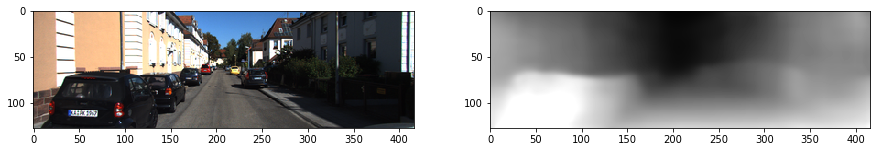

In [37]:
figure(figsize=(15,15))
subplot(1,2,1); imshow(I)
subplot(1,2,2); imshow(normalize_depth_for_display(pred['depth'][0,:,:,0]))